In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [33]:
data=pd.read_csv('Laliga.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [49]:
data=data.rename(columns=data.iloc[0]).drop(data.index[0])

In [50]:
data.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debu',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

In [54]:
data['Debu'].unique()

array(['1929', '1931', '1934', '1939', '1932', '1941', '1948', '1944',
       '1935', '1949', '1933', '1960', '1951', '1998', '1977', '1959',
       '2004', '1961', '1940', '1930', '1963', '1974', '1943', '1987',
       '1991', '2007', '1962', '1994', '1978', '1971', '1999', '2014',
       '1990', '1947', '1996', '1995', '1945', '1953', '1979', '1950',
       '2016', '2009', '1956', '1955', '2017'], dtype=object)

In [55]:
data['Debu']=data['Debu'].astype(str).str[:4].astype('int', copy=True, errors= 'ignore')

In [63]:
data['Since/LastApp']=data['Since/LastApp'].astype(str).str[:4].astype('int', copy=True, errors= 'ignore')

In [104]:
data['Points']=data['Points'].astype('int', copy=True, errors= 'ignore')

In [133]:
data['GamesPlayed']=data['GamesPlayed'].astype('int', copy=True, errors= 'ignore')
data['GamesWon']=data['GamesWon'].astype('int', copy=True, errors= 'ignore')
data['BestPosition']=data['BestPosition'].astype('int', copy=True, errors= 'ignore')

In [ ]:
data.replace('-',0,inplace=True)

In [56]:
data['Debu'].dtype

dtype('int32')

In [77]:
data['Debu'].min()

1929

In [ ]:
#1.Which are the teams which started playing between 1930-1980?

In [65]:
df_new = data[data['Debu'].between(1930, 1980)]

In [66]:
df_new.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debu,Since/LastApp,BestPosition
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934,2001,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939,2012,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932,2015,1
11,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,1,5,4,1,-,1,12,1941,2014,1


In [68]:
df_new['Debu'].describe()

count      37.000000
mean     1951.000000
std        14.632536
min      1930.000000
25%      1940.000000
50%      1949.000000
75%      1961.000000
max      1979.000000
Name: Debu, dtype: float64

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


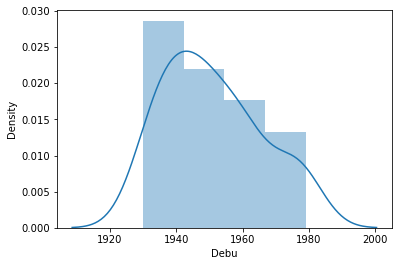

In [79]:
sns.distplot(df_new['Debu'])
plt.show()

In [112]:
data.dtypes

Pos              object
Team             object
Seasons          object
Points            int32
GamesPlayed       int32
GamesWon          int32
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debu              int32
Since/LastApp     int32
BestPosition     object
dtype: object

In [ ]:
#2.Which are the top 5 teams in terms of points?

In [107]:
data[['Points','Team']].sort_values(by = 'Points',ascending = False).head(5)

,Points,Team
1,4385,Real Madrid
2,4262,Barcelona
3,3442,Atletico Madrid
4,3386,Valencia
5,3368,Athletic Bilbao


In [110]:
data.sort_values(by='Points',ascending=False).head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debu,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [105]:
data['Points'].dtype

dtype('int32')

3.What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [134]:
data['WinningPercentage']=(data['GamesWon']/data['GamesPlayed'])*100

In [135]:
df=data[['Team','WinningPercentage','BestPosition']].sort_values(by='WinningPercentage',ascending=False)

In [136]:
df.head()

,Team,WinningPercentage,BestPosition
1,Real Madrid,59.630702,1
2,Barcelona,57.241130,1
3,Atletico Madrid,47.475134,1
4,Valencia,44.557057,1
5,Athletic Bilbao,43.772629,1


4.Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [ ]:
#H0=There is no significant difference
#H1=There is significant difference

In [140]:
a=df[df['BestPosition'].between(1,3)]

In [144]:
b=df[df['BestPosition'].between(4,7)]

In [148]:
t,p=stats.ttest_ind(a['WinningPercentage'],b['WinningPercentage'])

In [156]:
print('T-value',t)
print('P-value',p)

T-value 4.9927153394472805
P-value 1.5362101870160653e-05


In [ ]:
#Hence p value is less than 0.05 ,Hence we reject null Hypothesis,
#So we conclude there is significant difference b/w winning percentage of position 1-3 and 4-7

In [2]:
df=pd.read_csv('Golf.csv')

In [3]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


1.Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

In [ ]:
#H0-There is no significant difference between the performance of Old and New ball coating
#H1-There is significant difference between the performance of Old and New ball coating

2.Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.

In [6]:
stats,p_value=shapiro(df)
print('Test statistic:',stats,' ; P-Value :',p_value)

Test statistic: 0.9769172668457031  ; P-Value : 0.1566435992717743


P-Value greater than 0.05 then data is normally distributed

3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [8]:
np.std(df)

Current    8.64288
New        9.77241
dtype: float64

In [21]:
np.mean(df)

Current    270.275
New        267.500
dtype: float64

In [12]:
mean=267
std=9.77241

In [20]:
stats.norm.interval(0.95,loc=mean,scale=std/np.sqrt(40))

(263.9715544141783, 270.0284455858217)

In [24]:
z_score=(267-270)/(8.64/np.sqrt(40))
print('Zscore :',z_score)

Zscore : -2.196026152894708


Zscore less than p-value, thus we reject null hypothesis nad conclude there is enough evidence to claim there is significance of new ball and old ball

3)

In [25]:
n=200
mean_samp=140
std_samp=25

a)Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [33]:
140/np.sqrt(200)

9.899494936611665

9.899 is the estimate of standard error of the mean

b)Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [29]:
stats.norm.interval(0.95,loc=140,scale=25/np.sqrt(200))

(136.5352404391258, 143.4647595608742)

c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [30]:
stats.norm.interval(0.95,loc=140,scale=25/np.sqrt(100))

(135.10009003864985, 144.89990996135015)

d)Which of the two above intervals are wider?

Sample for 100 has wider interval

e)Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean